<a href="https://colab.research.google.com/github/choarauc/form/blob/main/121_ML_prevision_charges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving ENB_data.csv to ENB_data.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import ensemble
from sklearn import svm
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier

In [ ]:
df = pd.read_csv("ENB_data.csv", delimiter=',')
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
#X1 Compacité relative
#X2 Superficie
#X3 Superficie des murs
#X4 Superficie du toit
#X5 Hauteur hors tout 
#X6 Orientation
#X7 Surface de vitrage 
#X8 Répartition de la surface de vitrage
#y1 Charge de chauffage
#y2 Charge de refroidissement

df.columns = ['Relative_Compactness',
                      'Surface_Area',
                      'Wall_Area',
                      'Roof_Area',
                      'Overall_Height',
                      'Orientation',
                      'Glazing_Area',
                      'Glazing_Area_Distribution',
                      'Heating_Load',
                      'Cooling_Load']

In [ ]:
#Analysez les corrélations entre toutes les variables de df (on parle ici de la corrélation de Pearson)

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000,-0.991901,-0.203782,-0.868823,0.827747,0.000000,-0.000000,-0.000000,0.622272,0.634339
Surface_Area,-0.991901,1.000000,0.195502,0.880720,-0.858148,-0.000000,0.000000,0.000000,-0.658120,-0.672999
Wall_Area,-0.203782,0.195502,1.000000,-0.292316,0.280976,-0.000000,-0.000000,0.000000,0.455671,0.427117
Roof_Area,-0.868823,0.880720,-0.292316,1.000000,-0.972512,-0.000000,-0.000000,-0.000000,-0.861828,-0.862547
Overall_Height,0.827747,-0.858148,0.280976,-0.972512,1.000000,0.000000,0.000000,-0.000000,0.889431,0.895785
Orientation,0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.002587,0.014290
Glazing_Area,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,1.000000,0.212964,0.269841,0.207505
Glazing_Area_Distribution,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.212964,1.000000,0.087368,0.050525
Heating_Load,0.622272,-0.658120,0.455671,-0.861828,0.889431,-0.002587,0.269841,0.087368,1.000000,0.975862
Cooling_Load,0.634339,-0.672999,0.427117,-0.862547,0.895785,0.014290,0.207505,0.050525,0.975862,1.000000


In [ ]:
#	(d) Quelles variables explicatives sont les plus corrélées aux deux variables cibles (on pensera à regarder la valeur absolue de la corrélation) ?
#	(e) Que peut-on en déduire a priori ?

In [ ]:
# (f) Créez une nouvelle colonne à df, appelée charges_sum, totalisant pour chaque immeuble les charges de chauffage et de climatisation

df['charges_sum'] = df['Heating_Load'] + df['Cooling_Load']
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,charges_sum
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12


In [ ]:
# Dans une nouvelle variable charges_classes de type Series, découpez les immeubles en 4 classes distinctes avec pour labels 0, 1, 2 et 3 selon les 4 quartiles de la nouvelle variable créée.
# il faut créer des classes selon les quantiles de la variable load, vous pouvez passer par la fonction qcut ou cut

arr = df['charges_sum']
  
print("q0 : ", np.quantile(arr, .25)) 
print("q1 : ", np.quantile(arr, .50)) 
print("q2 : ", np.quantile(arr, .75)) 
print("q3 : ", np.quantile(arr, 1))  

df['charges_classes'] = pd.qcut(df.charges_sum, q=4,
                          labels = [0, 1, 2, 3])

pd.crosstab(df['charges_sum'], df['charges_classes'])

q0 :  28.75
q1 :  40.97
q2 :  64.33500000000001
q3 :  89.95


charges_classes,0,1,2,3
charges_sum,,,,
16.95,1,0,0,0
16.97,1,0,0,0
17.21,1,0,0,0
17.24,1,0,0,0
17.64,1,0,0,0
...,...,...,...,...
87.70,0,0,0,1
88.10,0,0,0,1
88.61,0,0,0,1


In [ ]:
# (h) Stockez dans un DataFrame nommé df_X les données explicatives uniquement.

df_X = df.drop('charges_classes', axis=1)

# (i) Séparez les données en un ensemble d'apprentissage et un ensemble de test (20%), avec df_X comme données explicatives et charges_classes comme variable cible.

target = df['charges_classes']
X_train, X_test, y_train, y_test = train_test_split(df_X, target, test_size=0.2)

# (j) Centrer et réduire les variables explicatives des deux échantillons de manière adéquate.

X_train_scaled = preprocessing.scale(X_train)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
# Dans la suite nous allons comparer plusieurs méthodes d'apprentissage. Pour chacune d'elles, il conviendra d'explorer le périmètre des hyperparamètres suivant :
# (a) Sélectionnez les hyperparamètres sur l'échantillon d’apprentissage par validation croisée
#	(b) Affichez les hyperparamètres retenus
#	(c) Appliquez le modèle à l'ensemble de test, affichez la matrice de confusion et le score du modèle sur ce dernier

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature n

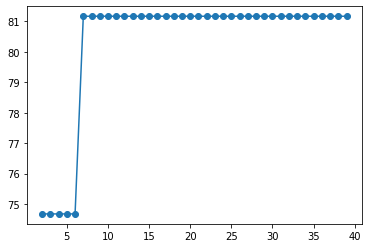

In [ ]:
# K-plus proches voisins. Hyperparamètre à régler :
# •	n_neighbors : 2 à 40

knn = neighbors.KNeighborsClassifier(n_neighbors=40, metric='minkowski')
knn.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV

knn = neighbors.KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(2, 40)}
knn_gscv = GridSearchCV(knn, param_grid)
knn_gscv.fit(X_train, y_train)

knn_gscv.best_params_

# le meilleur 'n_neighbors'= 3

knn_gscv.best_score_

y_pred = knn_gscv.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

score_minkowski = knn_gscv.score(X_test, y_test);

# erreur = 0.29 

import matplotlib.pyplot as plt 

score_minkowski = []
for k in range(2,40):
    knn = neighbors.KNeighborsClassifier(k)
    score_minkowski.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,40), score_minkowski, 'o-')
plt.show();



In [ ]:
# SVM. Hyperparamètres à régler :
# •	kernel : 'linear', 'sigmoid', 'rbf'
# •	C : 0.1, 1, 10, 30

clf = svm.SVC(gamma=0.01,  kernel='poly')
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

parametres = {'C':[ 0.1, 1, 10, 30], 'kernel':['linear', 'sigmoid', 'rbf']}

grid_clf = model_selection.GridSearchCV(estimator=clf, param_grid=parametres)
grille = grid_clf.fit(X_train_scaled,y_train)

#print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']]) 

print(grid_clf.best_params_)

#meilleurs param = {'C': 10, 'kernel': 'linear'}

y_pred = grid_clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])



{'C': 10, 'kernel': 'linear'}


Classe prédite,0,1,2,3
Classe réelle,,,,
0,38,3,0,0
1,0,38,1,0
2,0,0,29,0
3,0,0,0,45


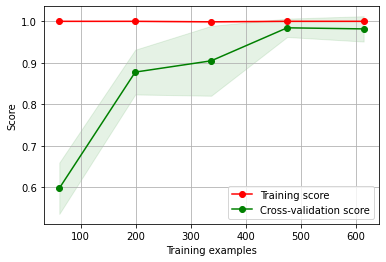

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline 

train_sizes, train_scores, valid_scores = learning_curve(svm.SVC(kernel='linear', C= 1), df, target, cv=5)

plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes, train_scores, test_scores = learning_curve(
    grid_clf, df, target, n_jobs=4, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best");

In [ ]:
# RandomForest. Hyperparamètres à régler :
# •	'max_features': "sqrt", "log2", None
# •	'min_samples_split': Nombres pairs allant de 2 à 30

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

params = {	'max_features' : ["sqrt", "log2", None] , 
          'min_samples_split': [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]}

clf = ensemble.RandomForestClassifier(n_jobs=30, max_features = "auto", min_samples_split =2)
clf.fit(X_train, y_train)
score = cross_val_score(clf,df_X, target,cv=10)
print ("le score est de :",score.mean())

y_predit=clf.predict(df_X)



le score est de : 0.9908749145591249


In [ ]:
# •	(d) Quel modèle fournit la meilleure précision ?

print ("le meilleur modèle est le randomforest avec un score de :",score.mean())

# •	(e) Aurions-nous pu entraîner un algorithme de régression à la place ?

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
model = lm.fit(X_train_scaled, y_train_scaled)

np.sqrt(mean_squared_error(y_train_scaled, model.predict(X_train_scaled)))
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))


le meilleur modèle est le randomforest avec un score de : 0.9908749145591249


1.8567183107980574